# Gerardo de Miguel González

# Feature Selection Proof of Concept

## References

**::GMG::** I've used the following main references:

  - [DataCamp](https://www.datacamp.com/community/tutorials/feature-selection-python) Beginner's Guide to Feature Selection in Python. *Learn about the basics of feature selection and how to implement and investigate various feature selection techniques in Python*. Sayak Paul. September 25th, 2018.
  - [Analytics Vidhya](https://www.analyticsvidhya.com/blog/2016/12/introduction-to-feature-selection-methods-with-an-example-or-how-to-select-the-right-variables/) Introduction to Feature Selection methods with an example (or how to select the right variables?). Saurav Kaushik, december 1, 2016.  
  
In kaggle there are *some interesting kernels* related to **feature selection** which use the dataset  referenced in datacamp (pima indians diabetes):

  - [Feature importance in pima diabetes study](https://www.kaggle.com/jy93630/pima-indian-diabetes-feature-importance-analysis)
  - [Some basic algorithms & feature selection ](https://www.kaggle.com/fickas/some-basic-algorithms-feature-selection) ([seel also](https://www.kaggle.com/shinto/some-basic-algorithms-feature-selection))
  - [Feature Selection & Prediction Evaluation](https://www.kaggle.com/reyhaneh/feature-selection-prediction-evaluation)

## Libraries

In [1]:
import pandas as pd
import numpy as np

## Dataset

**::GMG::** The dataset *was available* in [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php) but there's only [a text file](https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/) with a notice at the moment what reads:

*Thank you for your interest in the Pima Indians Diabetes dataset. 
The dataset is no longer available due to permission restrictions.*

**::GMG::** There are alternatives to downloading the csv formatted file though. I'm not sure whether those alternatives are going to keep being available in the near future. The first alternative that I've found out allows a direct download of a csv formated raw data, without any metadata (header):

  - [networkrepository.com](http://networkrepository.com/pima-indians-diabetes.php)
  
However you can read metadata info and citation policy in the web page. The website also provides tools for interactive exploration of data. You can visualize and interactively explore pima-indians-diabetes and its important statistics.

```BibText
@inproceedings{nr,
     title={The Network Data Repository with Interactive Graph Analytics and Visualization},
     author={Ryan A. Rossi and Nesreen K. Ahmed},
     booktitle={AAAI},
     url={http://networkrepository.com},
     year={2015}
}
```

**::NOTE::** I don't know how to deal with [Bibtext](https://en.wikipedia.org/wiki/BibTeX) bibliographic entries in Notebooks yet.

**::GMG::** You may also [download the data from kaggle](https://www.kaggle.com/uciml/pima-indians-diabetes-database/downloads/pima-indians-diabetes-database.zip/1) in zipped csv format (which *includes a header* with the column names by the way) using [the reference provided](https://www.kaggle.com/uciml/pima-indians-diabetes-database) in the Datacamp article *if you have an account in kaggle*. I haven't checked it but you should be able [to use the kaggle API](https://medium.com/@yvettewu.dw/tutorial-kaggle-api-google-colaboratory-1a054a382de0) to automate the download from code *with an API key* created with your account. 

**::GMG::** I've already downloaded the csv dataset *manually from kaggle* (with my account  and placed it in a data folder.

In [2]:
!ls data

pima-indians-diabetes.csv


In [3]:
#::GMG::Dataframe
data = pd.read_csv("data/pima-indians-diabetes.csv")

In [4]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [5]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**::GMG::** There are 8 different integer and real features and the categorical (binary) *Outcome* (i.e. classification) where 1 stands for having diabetes, and 0 denotes not havving diabetes. The dataset is known to have missing values. Specifically, there are missing observations for some columns that are marked as a zero value. A zero value will be invalid for for body mass index or blood pressure, for example.

**::GMG::** In Datacamp it's used a *preprocessed* version of the dataset raw downloaded from the [dataset folder](https://github.com/jbrownlee/Datasets) in the [Github repository of Jason Brown Lee](https://github.com/jbrownlee) a known [data scientist blogger](https://machinelearningmastery.com/) ....

In [6]:
# load data
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pd.read_csv(url, names=names)

In [7]:
dataframe.tail()

,preg,plas,pres,skin,test,mass,pedi,age,class
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [8]:
dataframe.describe()

,preg,plas,pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**::GMG::** To be honest I can't see any difference whatsoever, especially related to missing values (0 is min in blood pressure ...)

In [9]:
#::GMG::Split features and class and use numpy arrays for store them 
#       (in datacamp they argue for "faster computation")
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]

In [10]:
type(array)

numpy.ndarray

In [11]:
array.shape

(768, 9)

## Baseline (binary) classification

### Binary classification Model

**::GMG::** I'm gonna make a baseline classification to check whether the feature selection has any (positive) effect

**::NOTE::** Should I try another linear classifier ... say SVC or SGD or Decision Trees?

In [12]:
#::GMG::Logistic Regression for classification final model
from sklearn.linear_model import LogisticRegression

In [13]:
#::GMG::I must tell the solver I want, otherwise it yields:
#
#        'FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. 
#         Specify a solver to silence this warning. FutureWarning)'
#
# when doing model.fit()
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
# 'For small datasets, ‘liblinear’ is a good choice, whereas ‘sag’ and ‘saga’ are faster 
#  for large ones.'
lr = LogisticRegression(solver = 'liblinear')

### Exploratory Data Analysis and Data Split

In [14]:
#::GMG::A bit of EDA ...
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [15]:
#::GMG::They are the same, data and dataframe ;)
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
preg     768 non-null int64
plas     768 non-null int64
pres     768 non-null int64
skin     768 non-null int64
test     768 non-null int64
mass     768 non-null float64
pedi     768 non-null float64
age      768 non-null int64
class    768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [16]:
#::GMG::Beware of the imbalance dataset ...
#       https://www.quora.com/What-is-an-imbalanced-dataset
#       https://www.datacamp.com/community/tutorials/diving-deep-imbalanced-data
#       https://towardsdatascience.com/methods-for-dealing-with-imbalanced-data-5b761be45a18
#       How do I check? 
import matplotlib.pyplot as plt

In [17]:
classes = data.Outcome.values
unique, counts = np.unique(classes, return_counts=True)

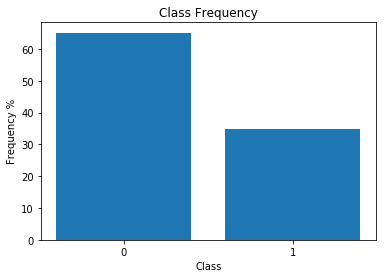

In [18]:
#::GMG::Say, 0 healthy, 1 diabetes
# https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.chararray.astype.html
# https://matplotlib.org/gallery/lines_bars_and_markers/categorical_variables.html
plt.bar(unique.astype(np.character),100*counts/classes.size)
plt.title('Class Frequency')
plt.xlabel('Class')
plt.ylabel('Frequency %')
plt.show()

In [19]:
#::GMG::Split train and test
# https://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection
from sklearn.model_selection import train_test_split

In [20]:
#::GMG::80/20 split
train, test = train_test_split(data, test_size = 0.2, random_state=27)

In [21]:
train.shape

(614, 9)

In [22]:
test.shape

(154, 9)

In [23]:
#::GMG::Somehow same imbalance in train dataset
classes_train = train.Outcome.values
unique, counts = np.unique(classes_train, return_counts = True)

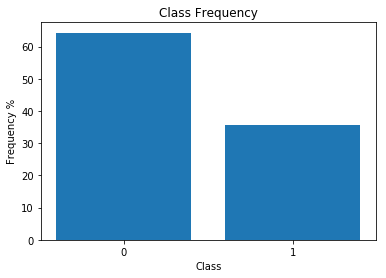

In [24]:
plt.bar(unique.astype(np.character),100*counts/classes_train.size)
plt.title('Class Frequency')
plt.xlabel('Class')
plt.ylabel('Frequency %')
plt.show()

In [25]:
#::GMG::A little more imabalanced in test dataset (should I care?)
classes_test = test.Outcome.values
unique, counts = np.unique(classes_test, return_counts = True)

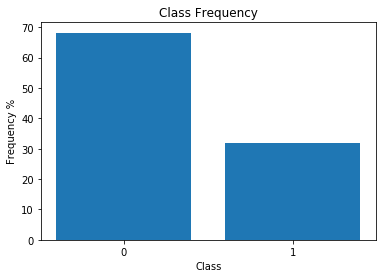

In [26]:
plt.bar(unique.astype(np.character),100*counts/classes_test.size)
plt.title('Class Frequency')
plt.xlabel('Class')
plt.ylabel('Frequency %')
plt.show()

### Stratified split

In [27]:
#::GMG::Let`s try something different
#       I'm going to preserve the proportions of classes with stratify parameter
# https://stackoverflow.com/questions/34842405/parameter-stratify-from-method-train-test-split-scikit-learn
x_train, x_test, y_train, y_test = train_test_split(
    data.iloc[:,:data.shape[1] - 1], data['Outcome'],
    test_size = 0.3,
    random_state = 69,
    stratify = data['Outcome']
)

In [28]:
classes_train = y_train.values
unique, counts = np.unique(classes_train, return_counts = True)

Text(0, 0.5, 'Frequency %')

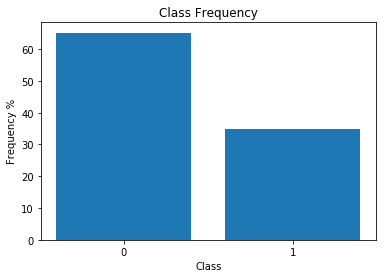

In [29]:
plt.bar(unique.astype(np.character),100*counts/classes_train.size)
plt.title('Class Frequency')
plt.xlabel('Class')
plt.ylabel('Frequency %')

In [30]:
classes_test = y_test.values
unique, counts = np.unique(classes_test, return_counts = True)

Text(0, 0.5, 'Frequency %')

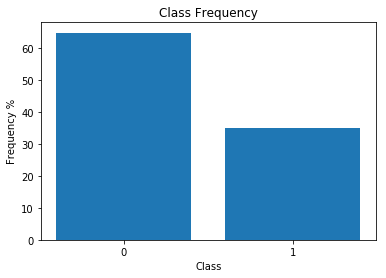

In [31]:
plt.bar(unique.astype(np.character),100*counts/classes_test.size)
plt.title('Class Frequency')
plt.xlabel('Class')
plt.ylabel('Frequency %')

### fit and predict

In [27]:
#::GMG::Split features/target in train and test
train_features = train.iloc[:,:data.shape[1] - 1]
train_target = train['Outcome']

In [28]:
train_features.shape

(614, 8)

In [29]:
train_target.shape

(614,)

In [30]:
test_features = test.iloc[:,:data.shape[1] - 1]
test_target = test['Outcome']

In [31]:
test_features.shape

(154, 8)

In [32]:
test_target.shape

(154,)

In [33]:
#::GMG::Train the model, default parameters except solver to avoid warning ;)
lr.fit(X = train_features, y = train_target)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [34]:
#::GMG::Let's see the training accuracy. I've done some formatting
# https://pyformat.info/#number
# https://www.python-course.eu/python3_formatted_output.php
print('{:4.3f}'.format(
    lr.score(X = train_features, y = train_target)))

0.774


In [35]:
#::GMG::Now it's time to predict
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
pred = lr.predict(X = test_features)

### metrics

In [36]:
#::GMG::I've tried other metrics ...
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score

In [37]:
#::GMG::Let's see the test accuracy (score) ... ¿overfitting?
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score
#::GMG::I may use the lr model object to get the same score (accuracy)
#print('{:4.3f}'.format(
#    lr.score(X = test_features, y = test_target)))
print('{:4.3f}'.format(accuracy_score(test_target, pred)))

0.753


In [38]:
#::GMG::What about sensitivity (aka recall) and specificity (biomed context like this one)
# https://en.wikipedia.org/wiki/Sensitivity_and_specificity
# https://stackoverflow.com/questions/33275461/specificity-in-scikit-learn
# https://scikit-learn.org/stable/modules/model_evaluation.html#confusion-matrix
tn, fp, fn, tp = confusion_matrix(y_true = test_target, y_pred = pred).ravel()

In [39]:
tn, fp, fn, tp

(91, 14, 24, 25)

In [41]:
specificity = tn / (tn + fp)
print('{:4.3f}'.format(specificity))

0.867


In [42]:
#::GMG::The precision is intuitively the ability of the classifier not to label as positive 
#       a sample that is negative.
print('{:4.3f}'.format(
    precision_score(y_true = test_target, y_pred = pred)))

0.641


In [43]:
#::GMG::The recall is intuitively the ability of the classifier to find all 
#       the positive samples (diabetes)
print('{:4.3f}'.format(
    recall_score(y_true = test_target, y_pred = pred)))

0.510


In [44]:
#::GMG::F1 score of the positive (diabetes) class
# F1 = 2 * (precision * recall) / (precision + recal)
# https://scikit-learn.org/stable/modules/model_evaluation.html#precision-recall-f-measure-metrics
print('{:4.3f}'.format(
    f1_score(average = 'binary', pos_label = 1,
             y_true = test_target, y_pred = pred)))

0.568


In [45]:
#::GMG::F1 score of the negative (healthy) class
print('{:4.3f}'.format(
    f1_score(average = 'binary', pos_label = 0,
             y_true = test_target, y_pred = pred)))

0.827


In [46]:
#::GMG::NOTE::one report ... 
# https://scikit-learn.org/stable/modules/model_evaluation.html#classification-report
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
# https://en.wikipedia.org/wiki/Precision_and_recall
from sklearn.metrics import classification_report

In [47]:
target_names = ['healthy', 'diabetes']
print(classification_report(y_true = test_target, y_pred = pred, 
                            target_names=target_names, digits = 3))

              precision    recall  f1-score   support

     healthy      0.791     0.867     0.827       105
    diabetes      0.641     0.510     0.568        49

   micro avg      0.753     0.753     0.753       154
   macro avg      0.716     0.688     0.698       154
weighted avg      0.743     0.753     0.745       154



### Other metrics

In [48]:
#::GMG::Scikit-learn has more metrics for dealing with the (im)balance
# https://scikit-learn.org/stable/modules/model_evaluation.html#balanced-accuracy-score
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.balanced_accuracy_score.html#sklearn.metrics.balanced_accuracy_score
from sklearn.metrics import balanced_accuracy_score

In [49]:
#::GMG:: It is the macro-average of recall scores per class or, equivalently, 
#        raw accuracy where each sample is weighted according to the inverse prevalence 
#        of its true class. Thus for balanced datasets, the score is equal to accuracy.
print('{:4.3f}'.format(
    balanced_accuracy_score(y_true = test_target, y_pred = pred)))

0.688


## Filter: $\chi^2$ statistical test

**::GMG::** Filter method $\chi^2$ statistical test for non-negative features to select 4 of the best features from the dataset. A [scikit-learn library](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_selection) provides the [`SelectKBest`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html#sklearn.feature_selection.SelectKBest) class that can be used with the [$\chi^2$ statistical test](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.chi2.html#sklearn.feature_selection.chi2).

In [50]:
# Import the necessary libraries first
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [51]:
# Feature extraction
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, Y)

In [52]:
#::GMG::I can see the p-values for each feature
fit.pvalues_

array([4.55261043e-026, 5.48728628e-309, 2.71819252e-005, 3.15697650e-013,
       0.00000000e+000, 1.32590849e-029, 2.02213728e-002, 2.51638830e-041])

In [53]:
# Summarize scores
np.set_printoptions(precision=3)
print(fit.scores_)

[ 111.52  1411.887   17.605   53.108 2175.565  127.669    5.393  181.304]


In [54]:
#::GMG::See scores related to features ...
# https://www.journaldev.com/15891/python-zip-function
for values in zip(dataframe.columns, fit.scores_):
    print(values)

('preg', 111.51969063588255)
('plas', 1411.887040644141)
('pres', 17.605373215320718)
('skin', 53.10803983632434)
('test', 2175.5652729220137)
('mass', 127.66934333103606)
('pedi', 5.39268154697145)
('age', 181.30368904430023)


In [55]:
for values in zip(data.columns, fit.scores_):
    print(values)

('Pregnancies', 111.51969063588255)
('Glucose', 1411.887040644141)
('BloodPressure', 17.605373215320718)
('SkinThickness', 53.10803983632434)
('Insulin', 2175.5652729220137)
('BMI', 127.66934333103606)
('DiabetesPedigreeFunction', 5.39268154697145)
('Age', 181.30368904430023)


In [56]:
#::GMG::I zip long column names and scores
zipped_full = zip(data.columns, fit.scores_)
zipped = zip(dataframe.columns, fit.scores_)

In [57]:
#::GMG::Rank the zipped object by score (key [1])
# https://docs.python.org/3.6/howto/sorting.html
# https://stackoverflow.com/questions/7142227/how-do-i-sort-a-zipped-list-in-python
sorted(zipped_full, key = lambda x: x[1], reverse = True)

[('Insulin', 2175.5652729220137),
 ('Glucose', 1411.887040644141),
 ('Age', 181.30368904430023),
 ('BMI', 127.66934333103606),
 ('Pregnancies', 111.51969063588255),
 ('SkinThickness', 53.10803983632434),
 ('BloodPressure', 17.605373215320718),
 ('DiabetesPedigreeFunction', 5.39268154697145)]

In [58]:
sorted(zipped, key = lambda x: x[1], reverse = True)

[('test', 2175.5652729220137),
 ('plas', 1411.887040644141),
 ('age', 181.30368904430023),
 ('mass', 127.66934333103606),
 ('preg', 111.51969063588255),
 ('skin', 53.10803983632434),
 ('pres', 17.605373215320718),
 ('pedi', 5.39268154697145)]

In [59]:
data.loc[:10, ('Insulin', 'Glucose', 'Age', 'BMI', 'Outcome')]

,Insulin,Glucose,Age,BMI,Outcome
0,0,148,50,33.6,1
1,0,85,31,26.6,0
2,0,183,32,23.3,1
3,94,89,21,28.1,0
4,168,137,33,43.1,1
5,0,116,30,25.6,0
6,88,78,26,31.0,1
7,0,115,29,35.3,0
8,543,197,53,30.5,1
9,0,125,54,0.0,1


In [60]:
dataframe.loc[:10, ('test', 'plas', 'age', 'mass', 'class')]

,test,plas,age,mass,class
0,0,148,50,33.6,1
1,0,85,31,26.6,0
2,0,183,32,23.3,1
3,94,89,21,28.1,0
4,168,137,33,43.1,1
5,0,116,30,25.6,0
6,88,78,26,31.0,1
7,0,115,29,35.3,0
8,543,197,53,30.5,1
9,0,125,54,0.0,1


In [61]:
#::GMG::Select features based on scores
#       fit_transform() will return a new array where the feature set has been reduced 
#       to the best 'k'. 
# https://datascience.stackexchange.com/questions/10773/how-does-selectkbest-work
features = fit.transform(X)

In [62]:
features.shape

(768, 4)

In [63]:
type(features)

numpy.ndarray

In [64]:
# Summarize selected features
#::GMG::Columns are not arranged by score (!!?)
#       i.e plas test mass age
print(features[0:10,:])

[[148.    0.   33.6  50. ]
 [ 85.    0.   26.6  31. ]
 [183.    0.   23.3  32. ]
 [ 89.   94.   28.1  21. ]
 [137.  168.   43.1  33. ]
 [116.    0.   25.6  30. ]
 [ 78.   88.   31.   26. ]
 [115.    0.   35.3  29. ]
 [197.  543.   30.5  53. ]
 [125.    0.    0.   54. ]]


In [65]:
#::GMG::I have the Outcome/class too
print (Y[0:10])

[1. 0. 1. 0. 1. 0. 1. 0. 1. 1.]


In [66]:
type(Y)

numpy.ndarray

**::GMG::** In the [feature selection uset guide](https://scikit-learn.org/stable/modules/feature_selection.html) of sckit-learn I can see that there are more methods that may be applied for classification, i.e. [f_classif](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_classif.html#sklearn.feature_selection.f_classif), [mutual_info_classif](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_classif.html#sklearn.feature_selection.mutual_info_classif). The latter requires *more samples* for accurate estimation. 

**::TBD::** Now I guess I should reshape the dataset with the selected features and try some classification algorithms to check if the performance has improved ...

In [67]:
#::GMG::Revover a dataframe with selected features
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html
# https://www.ritchieng.com/creating-dataframe-from-objects/
# https://stackoverflow.com/questions/20763012/creating-a-pandas-dataframe-from-a-numpy-array-how-do-i-specify-the-index-colum
df_fs = pd.DataFrame(data = features, 
                     columns = ('plas', 'test', 'mass', 'age'))

In [68]:
#::GMG::I add the class column
# https://www.quora.com/How-can-I-add-a-numpy-array-as-column-to-a-pandas-dataframe
df_fs['class'] = Y

## After $\chi^2$ classification

In [69]:
#::GMG::Now, let's see whether classification improves with chi2 feature selection
#       I'll use the dataset df_fs
df_fs.head(n= 10)

,plas,test,mass,age,class
0,148.0,0.0,33.6,50.0,1.0
1,85.0,0.0,26.6,31.0,0.0
2,183.0,0.0,23.3,32.0,1.0
3,89.0,94.0,28.1,21.0,0.0
4,137.0,168.0,43.1,33.0,1.0
5,116.0,0.0,25.6,30.0,0.0
6,78.0,88.0,31.0,26.0,1.0
7,115.0,0.0,35.3,29.0,0.0
8,197.0,543.0,30.5,53.0,1.0
9,125.0,0.0,0.0,54.0,1.0


In [72]:
train_fs, test_fs = train_test_split(df_fs, test_size = 0.2, random_state=35)

In [73]:
#::GMG::I slice the features in train dataset this way ...
train_fs.iloc[:,:4].head()

,plas,test,mass,age
297,126.0,215.0,30.7,24.0
116,124.0,0.0,34.0,38.0
718,108.0,178.0,35.5,24.0
487,173.0,265.0,46.5,58.0
185,194.0,0.0,35.9,41.0


In [77]:
test_fs.iloc[:,:4].head()

,plas,test,mass,age
78,131.0,0.0,43.2,26.0
193,135.0,0.0,52.3,40.0
77,95.0,0.0,37.7,27.0
336,117.0,0.0,33.8,44.0
752,108.0,0.0,26.0,25.0


In [74]:
lr.fit(X = train_fs.iloc[:,:4], y = train_fs['class'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [75]:
pred_fs = lr.predict(X = test_fs.iloc[:,:4])

In [76]:
#::GMG::It hasn't improved at all I'm afraid ... slightly worse f1-score
#       Why? I don't know at the moment 8-(
print(classification_report(y_true = test_fs['class'], y_pred = pred_fs, 
                            target_names=target_names, digits = 3))

              precision    recall  f1-score   support

     healthy      0.750     0.900     0.818       100
    diabetes      0.706     0.444     0.545        54

   micro avg      0.740     0.740     0.740       154
   macro avg      0.728     0.672     0.682       154
weighted avg      0.735     0.740     0.723       154



In [78]:
print('{:4.3f}'.format(
    balanced_accuracy_score(y_true = test_fs['class'], y_pred = pred_fs)))

0.672


In [81]:
#::GMG::Insuline/test has many 0s that are NOT valid values
df_fs['test'].isin([0]).sum()

374

In [82]:
df_fs['test'].size

768

In [84]:
#::GMG::Counting non-zeros by columns
# https://stackoverflow.com/questions/26053849/counting-non-zero-values-in-each-column-of-a-dataframe-in-python/34156147
df_fs.astype(bool).sum(axis=0)

plas     763
test     394
mass     757
age      768
class    268
dtype: int64